In [1]:
import pandas as pd
import numpy as np

# 1. Pandas Strings

### What are vectorized operations?

Vectorized string operations in pandas allow you to perform actions on entire columns of text quickly and easily. For example, to make all names in a column uppercase:

In [2]:
# This converts all the names to uppercase at once.
df = pd.DataFrame({'names': ['alice', 'bob', 'charlie']})
df['names'] = df['names'].str.upper()
print(df)

     names
0    ALICE
1      BOB
2  CHARLIE


### Problem in vectorized operations in vanilla python

- In vanilla Python, vectorized operations are not built-in, so you often need to use loops or list comprehensions to achieve similar results.
- if you have a list of strings and you want to check which strings start with the letter 'c', you can use a list comprehension. However, you need to handle None values to avoid errors.

In [3]:
s = ['cat', 'mat', None, 'rat']

[i.startswith('c') for i in s]

AttributeError: 'NoneType' object has no attribute 'startswith'

### How pandas solve this issue?

Pandas provides built-in methods that handle None (and NaN) values gracefully during vectorized operations. This makes operations more concise and error-free compared to vanilla Python.

In [4]:
s = pd.Series(['cat', 'mat', None, 'rat'])

# str -> string accessor
s.str.startswith('c')

0     True
1    False
2     None
3    False
dtype: object

In [5]:
# import titanic dataset
df = pd.read_csv(r'C:\Users\SVF\Downloads\Datasets\Vectorized String Operations\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Common Functions

- lower/upper/capitalize/title
- len
- strip
- split
- replace
- filtering (startswith/endswith, isdigit/isalpha...)
- apply regex
- contains
- slicing

In [6]:
# lower/upper/capitalize/title
df['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [7]:
# len
df['Name'].str.len()

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [8]:
# max character in name
print(df['Name'].str.len().max())

82


In [9]:
df['Name'][df['Name'].str.len() == 82].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [10]:
# strip
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [11]:
# split
df['lastname'] = df['Name'].str.split(',').str.get(0)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings


In [12]:
df[['title', 'firstname']] = df['Name'].str.split(',').str.get(1).str.split(n=1, expand=True) # expand -> converting series to dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [13]:
df['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

In [14]:
# replace
df['title'] = df['title'].str.replace('Ms.','Miss.')
df['title'] = df['title'].str.replace('Mlle.','Miss.')

C:\Users\SVF\AppData\Local\Temp\ipykernel_5156\3731174169.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Ms.','Miss.')
C:\Users\SVF\AppData\Local\Temp\ipykernel_5156\3731174169.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title'] = df['title'].str.replace('Mlle.','Miss.')


In [15]:
# filtering (startswith/endswith)
# startswith -> first name starts with 'A'
df[df['firstname'].str.startswith('A')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss.,"Anna ""Annie"""
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Holverson,Mr.,Alexander Oskar
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss.,Amelie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Serepeca,Miss.,Augusta
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Duran y More,Miss.,Asuncion
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss.,"Adele Kiamie ""Jane"""


In [16]:
# endswith -> first name ends with 's'
df[df['firstname'].str.endswith('s')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,NaN,S,Cann,Mr.,Ernest Charles
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,Lennon,Mr.,Denis
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Ostby,Mr.,Engelhart Cornelius
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,813,0,2,"Slemen, Mr. Richard James",male,35.0,0,0,28206,10.5000,NaN,S,Slemen,Mr.,Richard James
841,842,0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5000,NaN,S,Mudd,Mr.,Thomas Charles
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S,Andersson,Master.,Sigvard Harald Elias
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,Banfield,Mr.,Frederick James


In [17]:
# filtering (isdigit/isalpha..)
df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [18]:
# apply regex -> search name 'john'
# contains
df[df['firstname'].str.contains('john', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [19]:
# find lastname start and end character vowel
df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [20]:
# slicing -> first 4 characters
df['Name'].str[:5]

0      Braun
1      Cumin
2      Heikk
3      Futre
4      Allen
       ...  
886    Montv
887    Graha
888    Johns
889    Behr,
890    Doole
Name: Name, Length: 891, dtype: object

# 2. Date and Time in Pandas

## 2.1 Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [21]:
pd.Timestamp('2024/05/17') # format -> year/month/date

Timestamp('2024-05-17 00:00:00')

In [22]:
# variations
pd.Timestamp('2024-05-17')
pd.Timestamp('2024, 05, 17')

Timestamp('2024-05-17 00:00:00')

In [23]:
# only year
pd.Timestamp('2024')

Timestamp('2024-01-01 00:00:00')

In [24]:
# using text
pd.Timestamp('17 May 2024')

Timestamp('2024-05-17 00:00:00')

In [25]:
# providing time also
pd.Timestamp('2024-05-17 10:20AM')

Timestamp('2024-05-17 10:20:00')

In [26]:
# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2024,5,17,10,22,56))
x

Timestamp('2024-05-17 10:22:56')

In [27]:
# Fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

56

### why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [28]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [29]:
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

## 2.2 DatetimeIndex Object

A collection of pandas timestamp

In [30]:
# from strings
t = pd.DatetimeIndex(['2023/1/1', '2022/1/1', '2021/1/1'])
print(t)
print(type(t))

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [31]:
print(t[0])
print(type(t[0]))

2023-01-01 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [32]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1), dt.datetime(2022,1,1), dt.datetime(2021,1,1)])

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [33]:
# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1), pd.Timestamp(2022,1,1), pd.Timestamp(2021,1,1)])
dt_index

DatetimeIndex(['2023-01-01', '2022-01-01', '2021-01-01'], dtype='datetime64[ns]', freq=None)

In [34]:
# using datetime index as a series index
pd.Series([1,2,3], index=dt_index)

2023-01-01    1
2022-01-01    2
2021-01-01    3
dtype: int64

# 3. date_range function

In [35]:
# generate daily dates in a given range
pd.date_range(start='2024/05/17', end='2024/05/31', freq='D')

DatetimeIndex(['2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20',
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# alternate days in a given range
pd.date_range(start='2024/05/17', end='2024/05/31', freq='2D')

DatetimeIndex(['2024-05-17', '2024-05-19', '2024-05-21', '2024-05-23',
               '2024-05-25', '2024-05-27', '2024-05-29', '2024-05-31'],
              dtype='datetime64[ns]', freq='2D')

In [37]:
# B -> Business days
pd.date_range(start='2024/05/17', end='2024/05/31', freq='B')

DatetimeIndex(['2024-05-17', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-24', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31'],
              dtype='datetime64[ns]', freq='B')

In [38]:
# W -> one week per day
pd.date_range(start='2024/05/17', end='2024/05/31', freq='W')

DatetimeIndex(['2024-05-19', '2024-05-26'], dtype='datetime64[ns]', freq='W-SUN')

In [39]:
# H -> Hourly data
pd.date_range(start='2024/05/17', end='2024/05/31', freq='H') # for every 2 hrs -> 2H

DatetimeIndex(['2024-05-17 00:00:00', '2024-05-17 01:00:00',
               '2024-05-17 02:00:00', '2024-05-17 03:00:00',
               '2024-05-17 04:00:00', '2024-05-17 05:00:00',
               '2024-05-17 06:00:00', '2024-05-17 07:00:00',
               '2024-05-17 08:00:00', '2024-05-17 09:00:00',
               ...
               '2024-05-30 15:00:00', '2024-05-30 16:00:00',
               '2024-05-30 17:00:00', '2024-05-30 18:00:00',
               '2024-05-30 19:00:00', '2024-05-30 20:00:00',
               '2024-05-30 21:00:00', '2024-05-30 22:00:00',
               '2024-05-30 23:00:00', '2024-05-31 00:00:00'],
              dtype='datetime64[ns]', length=337, freq='H')

In [40]:
# M -> Month End
pd.date_range(start='2024/05/17', end='2024/05/31', freq='M')

DatetimeIndex(['2024-05-31'], dtype='datetime64[ns]', freq='M')

In [41]:
# MS -> Month Start
pd.date_range(start='2024/04/17', end='2024/05/31', freq='MS')

DatetimeIndex(['2024-05-01'], dtype='datetime64[ns]', freq='MS')

In [42]:
# A -> Year End
pd.date_range(start='2024/05/17', end='2025/05/31', freq='A')

DatetimeIndex(['2024-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [43]:
# using periods
pd.date_range(start='2024/05/17', periods=25)

DatetimeIndex(['2024-05-17', '2024-05-18', '2024-05-19', '2024-05-20',
               '2024-05-21', '2024-05-22', '2024-05-23', '2024-05-24',
               '2024-05-25', '2024-05-26', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-30', '2024-05-31', '2024-06-01',
               '2024-06-02', '2024-06-03', '2024-06-04', '2024-06-05',
               '2024-06-06', '2024-06-07', '2024-06-08', '2024-06-09',
               '2024-06-10'],
              dtype='datetime64[ns]', freq='D')

# 4. to_datetime functions

- Converts an existing objects to pandas timestamp/datetimeindex object

In [44]:
# series
s = pd.Series(['2023/1/1', '2022/1/1', '2021/1/1'])
print(s)
print(type(s))

0    2023/1/1
1    2022/1/1
2    2021/1/1
dtype: object
<class 'pandas.core.series.Series'>


In [45]:
# (year, month, day, day_name(), month_name(), is_month_end, is_quarter_end, is_month_start, is_quarter_start)
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [46]:
# with errors
s = pd.Series(['2023/1/1', '2022/1/1', '2021/13/1'])
pd.to_datetime(s)

ParserError: month must be in 1..12: 2021/13/1

In [47]:
pd.to_datetime(s, errors='coerce')

0   2023-01-01
1   2022-01-01
2          NaT
dtype: datetime64[ns]

In [48]:
df = pd.read_csv(r'C:\Users\SVF\Downloads\Datasets\Vectorized String Operations/expense_data.csv')
df.sample(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
127,1/6/2022 14:22,CUB - online payment,Food,NaN,Bingo,10.0,Expense,NaN,10.0,INR,10.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [50]:
# convert Date fro object to datetime
df['Date'] = pd.to_datetime(df['Date'])

### dt accessor

Accesser object for datetime like properties of the Series values.

In [51]:
df['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

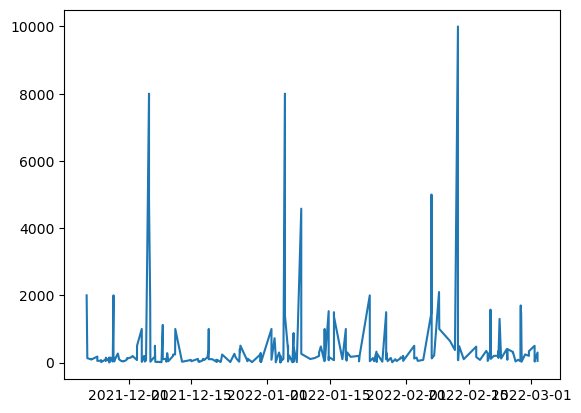

In [52]:
# plot graph
import matplotlib.pyplot as plt

plt.plot(df['Date'], df['INR'])

<AxesSubplot:xlabel='day_name'>

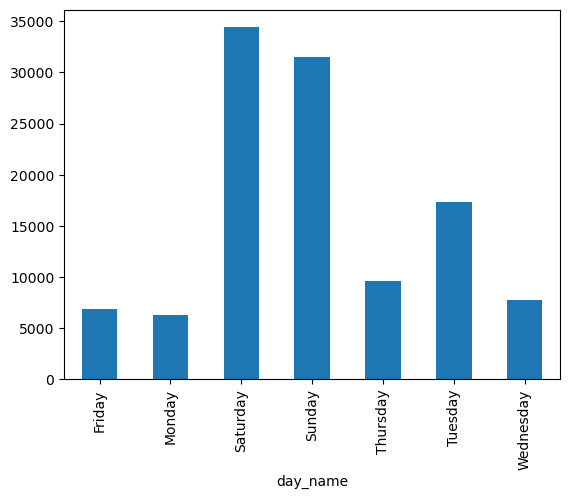

In [53]:
# day_name wise bar chart
df['day_name'] = df['Date'].dt.day_name()
df.groupby(df['day_name'])['INR'].sum().plot(kind='bar')

<AxesSubplot:xlabel='month_name'>

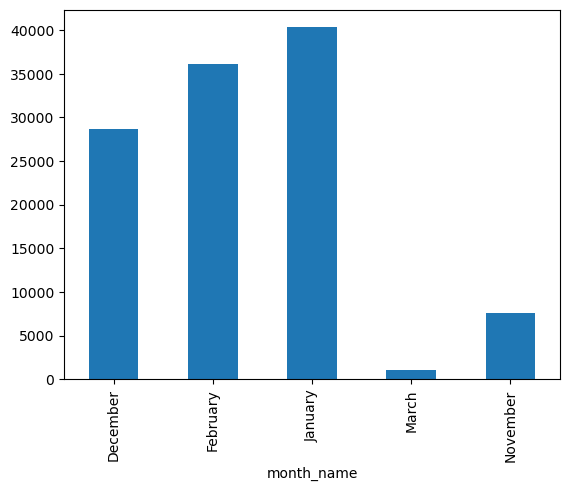

In [54]:
# month wise bar chart
df['month_name'] = df['Date'].dt.month_name()
df.groupby(df['month_name'])['INR'].sum().plot(kind='bar')